Le fichier data/apple_history.csv a été en réalité récupéré d'une API en ligne. Le code utilisé est à suivre, mais cela sera peut-être bloqué, auquel cas utiliser le fichier csv. 

In [1]:
#import yfinance
#
#apple = yfinance.Ticker("AAPL")
#apple_df = apple.history(period="1d", start="2010-01-01", end="2025-01-01")
#print(apple_df.head())

Essayez de rassembler les imports en début de script. Ici, étant donné que nous mélangeons différentes parties (visualisation, différentes méthodes statistiques...),j'ai fait le choix de répartir les imports dans les différents blocs.

In [ ]:
import pandas as pd

In [3]:
apple_df = pd.read_csv("../../data/apple_history.csv")

In [5]:
apple_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.414463,6.446621,6.382907,6.431895,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.449629,6.479382,6.409055,6.443017,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.443018,6.468564,6.333921,6.340533,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.363974,6.371488,6.282828,6.328811,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.320397,6.371489,6.283130,6.370888,447610800,0.0,0.0


In [6]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3774 non-null   object 
 1   Open          3774 non-null   float64
 2   High          3774 non-null   float64
 3   Low           3774 non-null   float64
 4   Close         3774 non-null   float64
 5   Volume        3774 non-null   int64  
 6   Dividends     3774 non-null   float64
 7   Stock Splits  3774 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 236.0+ KB


In [8]:
apple_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3774.000000,3774.000000
mean,67.377155,68.086942,66.709768,67.433262,2.299200e+08,0.002316,0.002915
std,65.438023,66.125667,64.819099,65.516757,2.180726e+08,0.020785,0.131222
min,5.781524,5.890620,5.717810,5.771908,2.323470e+07,0.000000,0.000000
25%,17.442398,17.622328,17.293327,17.438814,8.492275e+07,0.000000,0.000000
50%,35.308430,35.681947,34.917551,35.277456,1.403920e+08,0.000000,0.000000
75%,126.173636,127.831540,124.664336,126.743427,3.081386e+08,0.000000,0.000000
max,257.568678,259.474086,257.010028,258.396667,1.880998e+09,0.250000,7.000000


Explorer ce fichier ? Y a-t-il des valeurs manquantes ?

In [9]:
# Non

Visualiser l'historique des prix de clôture sur un graphe simple.

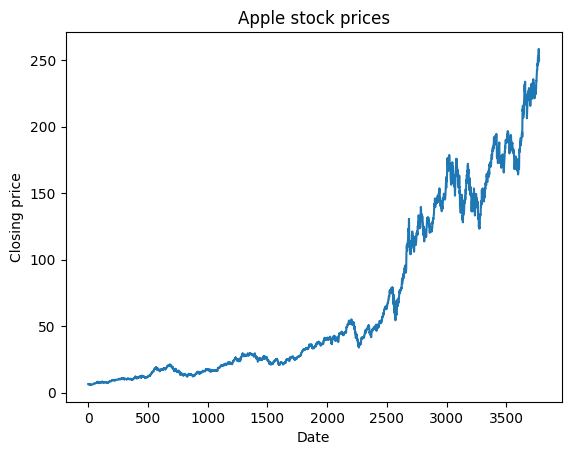

In [11]:
import matplotlib.pyplot as plt

plt.plot(apple_df.index, apple_df["Close"])
plt.title("Apple stock prices")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

Calculer la variation relative du cours de clôture d'une journée à l'autre. Pour cela, chercher dans la documentation ou sur internet une méthode des Series de pandas réalisant directement ce calcul.

In [14]:
apple_df["relative_variation"] = apple_df["Close"].pct_change().fillna(0)

In [15]:
apple_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,relative_variation
0,2010-01-04 00:00:00-05:00,6.414463,6.446621,6.382907,6.431895,493729600,0.0,0.0,0.000000
1,2010-01-05 00:00:00-05:00,6.449629,6.479382,6.409055,6.443017,601904800,0.0,0.0,0.001729
2,2010-01-06 00:00:00-05:00,6.443018,6.468564,6.333921,6.340533,552160000,0.0,0.0,-0.015906
3,2010-01-07 00:00:00-05:00,6.363974,6.371488,6.282828,6.328811,477131200,0.0,0.0,-0.001849
4,2010-01-08 00:00:00-05:00,6.320397,6.371489,6.283130,6.370888,447610800,0.0,0.0,0.006648
...,...,...,...,...,...,...,...,...,...
3769,2024-12-24 00:00:00-05:00,254.875189,257.588630,254.675658,257.578674,23234700,0.0,0.0,0.011478
3770,2024-12-26 00:00:00-05:00,257.568678,259.474086,257.010028,258.396667,27237100,0.0,0.0,0.003176
3771,2024-12-27 00:00:00-05:00,257.209530,258.077462,252.451019,254.974930,42355300,0.0,0.0,-0.013242
3772,2024-12-30 00:00:00-05:00,251.623005,252.889953,250.146571,251.593079,35557500,0.0,0.0,-0.013263


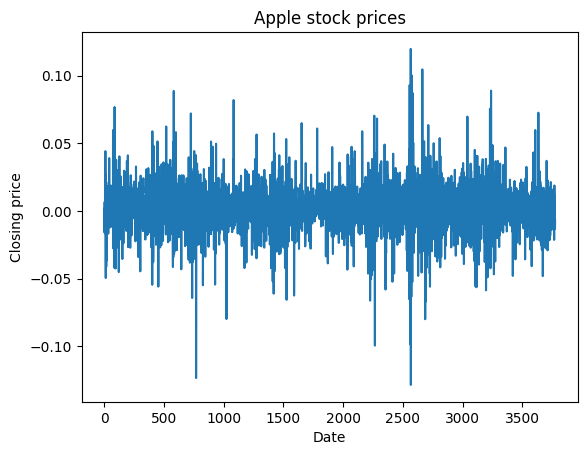

In [16]:
plt.plot(apple_df.index, apple_df["relative_variation"])
plt.title("Apple stock prices")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

A l'aide de scipy, calculer le z-score associé à cette colonne. Déterminer les journées à variations atypiques à partir de ce score (vous pouvez par exemple par un seuil égal à 5, à 3...).

In [17]:
from scipy.stats import zscore

apple_df["z_score"] = zscore(
    apple_df["relative_variation"],
    # nan_policy="omit",
)

In [20]:
unusual_data = apple_df[abs(apple_df["z_score"]) > 5]
len(unusual_data)

9

In [21]:
unusual_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,relative_variation,z_score
769,2013-01-24 00:00:00-05:00,13.947698,14.121438,13.652066,13.659648,1460852400,0.0,0.0,-0.123558,-7.105464
2265,2019-01-03 00:00:00-05:00,34.297218,34.711701,33.825567,33.870827,365248800,0.0,0.0,-0.099608,-5.740562
2556,2020-03-02 00:00:00-05:00,68.413722,73.057364,67.308555,72.419952,341397200,0.0,0.0,0.093101,5.241603
2564,2020-03-12 00:00:00-04:00,62.029918,65.437516,60.105570,60.161312,418474000,0.0,0.0,-0.098755,-5.691963
2565,2020-03-13 00:00:00-04:00,64.199052,67.841740,61.305256,67.369133,370732000,0.0,0.0,0.119808,6.763638


Visualiser les lignes associées, ainsi que les lignes des journées précédentes.

In [22]:
outlier_mask = abs(apple_df["z_score"]) > 5
display_mask = outlier_mask | outlier_mask.shift(-1, fill_value=False)
apple_df[display_mask]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,relative_variation,z_score
768,2013-01-23 00:00:00-05:00,15.427672,15.615057,15.305176,15.585342,861509600,0.0,0.0,0.018305,0.979121
769,2013-01-24 00:00:00-05:00,13.947698,14.121438,13.652066,13.659648,1460852400,0.0,0.0,-0.123558,-7.105464
2264,2019-01-02 00:00:00-05:00,36.896080,37.839387,36.738862,37.617851,148158800,0.0,0.0,0.001141,0.000972
2265,2019-01-03 00:00:00-05:00,34.297218,34.711701,33.825567,33.870827,365248800,0.0,0.0,-0.099608,-5.740562
2555,2020-02-28 00:00:00-05:00,62.349859,67.475798,62.134154,66.251869,426510000,0.0,0.0,-0.000585,-0.097390
2556,2020-03-02 00:00:00-05:00,68.413722,73.057364,67.308555,72.419952,341397200,0.0,0.0,0.093101,5.241603
2563,2020-03-11 00:00:00-04:00,67.228581,68.156821,65.888316,66.753548,255598800,0.0,0.0,-0.034730,-2.043296
2564,2020-03-12 00:00:00-04:00,62.029918,65.437516,60.105570,60.161312,418474000,0.0,0.0,-0.098755,-5.691963
2565,2020-03-13 00:00:00-04:00,64.199052,67.841740,61.305256,67.369133,370732000,0.0,0.0,0.119808,6.763638
2566,2020-03-16 00:00:00-04:00,58.639296,62.790941,58.166693,58.702312,322423600,0.0,0.0,-0.128647,-7.395462


Calculer les quartiles Q1 et Q3, l'écart inter-quartile IQR, et repérer les points en dehors de la plage [Q1 - 1,5 IQR; Q3 + 1,5 IQR]. Visualiser les lignes associées, ainsi que les lignes des journées précédentes.

In [25]:
q1  = apple_df["relative_variation"].quantile(0.25)
q3  = apple_df["relative_variation"].quantile(0.75)
iqr = q3 - q1

borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

apple_df["outlier_iqr"] = (apple_df["relative_variation"] < borne_inf) | (apple_df["relative_variation"] > borne_sup)

outliers_iqr = apple_df[apple_df["outlier_iqr"]]

In [27]:
outlier_mask = apple_df["outlier_iqr"]
mask_pairs = outlier_mask | outlier_mask.shift(-1, fill_value=False)
apple_df[mask_pairs].head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,relative_variation,z_score,outlier_iqr
9,2010-01-15 00:00:00-05:00,6.339331,6.359467,6.187256,6.189060,594067600,0.0,0.0,-0.016712,-1.016456,False
10,2010-01-19 00:00:00-05:00,6.261189,6.467360,6.228430,6.462852,730007600,0.0,0.0,0.044238,2.457003,True
12,2010-01-21 00:00:00-05:00,6.373891,6.410857,6.227527,6.253373,608154400,0.0,0.0,-0.017286,-1.049195,False
13,2010-01-22 00:00:00-05:00,6.214605,6.236244,5.925484,5.943215,881767600,0.0,0.0,-0.049598,-2.890612,True
16,2010-01-27 00:00:00-05:00,6.216709,6.328811,5.996712,6.247665,1722568400,0.0,0.0,0.009420,0.472786,False


Pour le moment, nous n'avons utilisé qu'une seule colonne (celle des prix de clôture). Visualiser la matrice de corrélation des colonnes du dataframe.

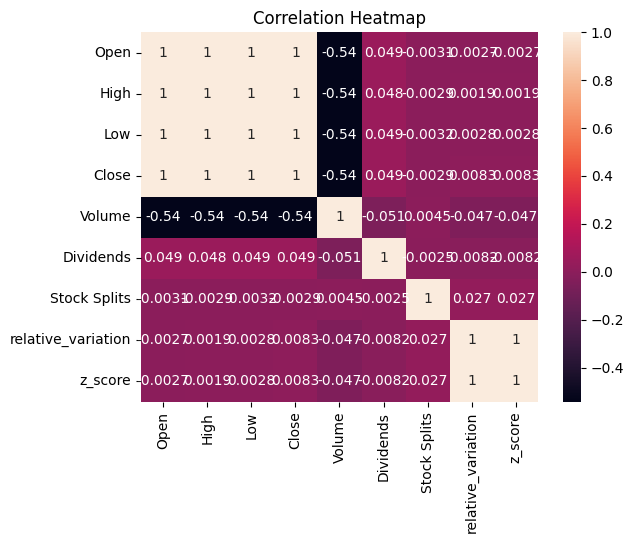

In [30]:
import seaborn as sns
import numpy as np

num_cols = apple_df.select_dtypes(include=np.number)

correlation_matrix = num_cols.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Utilisons certaines de ces colonnes pour réaliser un modèle simple de prédiction. Essayer de réaliser une régression linéaire du cours de clôture à partir de colonnes que vous jugez pertinentes.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = apple_df.drop(columns=["Close", "Date"])
y = apple_df["Close"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Afficher les coefficients du modèle
model.coef_



array([-4.61193754e-01,  7.20751106e-01,  7.41124659e-01,  7.21326227e-11,
        5.45370908e-01, -2.05100161e-02,  3.84133575e-03,  2.18912315e-01])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3166422126225799
R-squared: 0.9999253085605688


Est-il possible de faire une prédiction du cours de clôture pour aujourd'hui ? Critiquer la regression linéaire pour cette application.

Bonus : s'il vous reste du temps, essayer de réaliser une ARIMA sur le cours de clôture.

In [ ]:
import statsmodels.api as sm
close_pd = apple_df.orderBy("Date").select("Close").toPandas()["Close"]
model_arima = sm.tsa.ARIMA(close_pd, order=(5,1,0)).fit()
print(model_arima.summary())

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7074.578
Date:                Sun, 29 Jun 2025   AIC                          14161.157
Time:                        18:52:09   BIC                          14198.571
Sample:                             0   HQIC                         14174.459
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0115      0.009     -1.337      0.181      -0.028       0.005
ar.L2         -0.0244      0.009     -2.649      0.008      -0.043      -0.006
ar.L3         -0.0240      0.010     -2.474      0.0